PROBLEM STATEMENT
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.
Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [9]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


#Reading dataset
data = pd.read_csv('D:/Users/sonshind/Desktop/2021_vision_Board/DataSet/Walmart_Store_sales.csv')

In [10]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

## Q1 : Which store has maximum weekly sales in this dataset?

In [22]:
data.loc[data['Weekly_Sales'] == data['Weekly_Sales'].max()]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


## Ans :So the answer is "Store 14" has maximum weekly sales.

## Q2 :Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variance (C0V)

In [31]:
#To find out SD for each group we are using groupby function 
# and then agg to check std and mean for weekly sales.

maxstd=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

#resetting index
maxstd = maxstd.reset_index()

maxstd

Store   Weekly_Sales              
                    std          mean
0      1  155980.767761  1.555264e+06
1      2  237683.694682  1.925751e+06
2      3   46319.631557  4.027044e+05
3      4  266201.442297  2.094713e+06
4      5   37737.965745  3.180118e+05
5      6  212525.855862  1.564728e+06
6      7  112585.469220  5.706173e+05
7      8  106280.829881  9.087495e+05
8      9   69028.666585  5.439806e+05
9     10  302262.062504  1.899425e+06
10    11  165833.887863  1.356383e+06
11    12  139166.871880  1.009002e+06
12    13  265506.995776  2.003620e+06
13    14  317569.949476  2.020978e+06
14    15  120538.652043  6.233125e+05
15    16   85769.680133  5.192477e+05
16    17  112162.936087  8.935814e+05
17    18  176641.510839  1.084718e+06
18    19  191722.638730  1.444999e+06
19    20  275900.562742  2.107677e+06
20    21  128752.812853  7.560691e+05
21    22  161251.350631  1.028501e+06
22    23  249788.038068  1.389864e+06
23    24  167745.677567  1.356755e+06
24    25  112976.788600  7.067215e+05
25    26  110431.288141  1.002912e+06
26    27  239930.135688  1.775216e+06
27    28  181758.967539  1.323522e+06
28    29   99120.136596  5.394514e+05
29    30   22809.665590  4.385796e+05
30    31  125855.942933  1.395901e+06
31    32  138017.252087  1.166568e+06
32    33   24132.927322  2.598617e+05
33    34  104630.164676  9.667816e+05
34    35  211243.457791  9.197250e+05
35    36   60725.173579  3.735120e+05
36    37   21837.461190  5.189003e+05
37    38   42768.169450  3.857317e+05
38    39  217466.454833  1.450668e+06
39    40  119002.112858  9.641280e+05
40    41  187907.162766  1.268125e+06
41    42   50262.925530  5.564039e+05
42    43   40598.413260  6.333247e+05
43    44   24762.832015  3.027489e+05
44    45  130168.526635  7.859814e+05

In [41]:
#since coeficient of varience = standard deviation / mean
maxstd['CoV'] =  (maxstd['Weekly_Sales','std']/maxstd['Weekly_Sales','mean']) *100

maxstd['CoV']

0     10.029212
1     12.342388
2     11.502141
3     12.708254
4     11.866844
5     13.582286
6     19.730469
7     11.695283
8     12.689547
9     15.913349
10    12.226183
11    13.792532
12    13.251363
13    15.713674
14    19.338399
15    16.518065
16    12.552067
17    16.284550
18    13.268012
19    13.090269
20    17.029239
21    15.678288
22    17.972115
23    12.363738
24    15.986040
25    11.011066
26    13.515544
27    13.732974
28    18.374247
29     5.200804
30     9.016105
31    11.831049
32     9.286835
33    10.822524
34    22.968111
35    16.257891
36     4.208412
37    11.087545
38    14.990779
39    12.342978
40    14.817711
41     9.033533
42     6.410363
43     8.179331
44    16.561273
Name: CoV, dtype: float64

In [43]:
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

### QUESTION 3 :- Which store/s has good quarterly growth rate in Q3’2012

In [59]:
#Converting the data type of date column to dateTime 
data['Date'] = pd.to_datetime(data['Date'])

Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))


Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

#Collecting the data of Q3 and Q2 from original dataset.

Q2_data = data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3_data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2_data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales' : 'Q2_Weekly_Sales'},inplace=True)


#finding the sum weekly sales of each store in Q3
Q3 = pd.DataFrame(Q3_data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth = Q2.merge(Q3,how='inner' ,on='Store')

#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =((Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales']) / Q3_Growth['Q2_Weekly_Sales']) *100
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False)


,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-2.79
6,7,7613593.92,7322393.92,-3.82
34,35,10753570.97,10252122.68,-4.66
25,26,13218289.66,12417575.35,-6.06
38,39,20191585.63,18899955.17,-6.40
22,23,18283424.90,17103654.36,-6.45
40,41,17560035.88,16373588.44,-6.76
43,44,4322555.33,4020486.01,-6.99
31,32,15415236.21,14142164.84,-8.26
36,37,6859777.96,6250524.08,-8.88


## Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [71]:
#finding the mean sales of non holiday first - 
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

#marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31))
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

#Calculating the mean sales during the holidays
Christmas_sales_data = data [(data['Date'] == 'Christmas1') |(data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_sales_data=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_sales_data=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]

list_of_mean_sales ={'Christmas_mean_sales' :round(Christmas_sales_data['Weekly_Sales'].mean(),2),
                    'Thanksgiving_mean_sales': round(Thanksgiving_sales_data['Weekly_Sales'].mean(),2),
                    'LabourDay_mean_sales' : round(LabourDay_sales_data['Weekly_Sales'].mean(),2),
                    'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 1023165.8,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'Non holiday weekly sales': 1041256.3802088564}

## Ans : only sales on Thanks Giving holiday are greter than Non holiday sale

## Q 5 : Provide a Monthly,Quaterly and Semester view of sales in units and give insights.

Text(0, 0.5, 'Weekly_Sales')

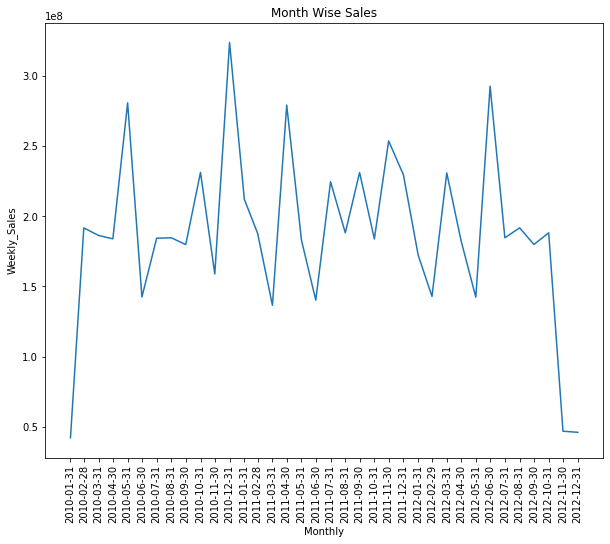

In [77]:
# Monthly Sales
monthly = data.groupby(pd.Grouper(key ='Date' , freq='1M')).sum()
monthly = monthly.reset_index()
fig,ax = plt.subplots(figsize = (10,8))
x = monthly['Date']
y = monthly['Weekly_Sales']
plt.plot(x,y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.xticks(x, rotation = 90)
plt.ylabel('Weekly_Sales')

#1. We can observe from the Monthly Sales Graph that 
# highest sum of sales is recorded in between jan-2011 to march-2011.

Text(0, 0.5, 'Weekly_Sales')

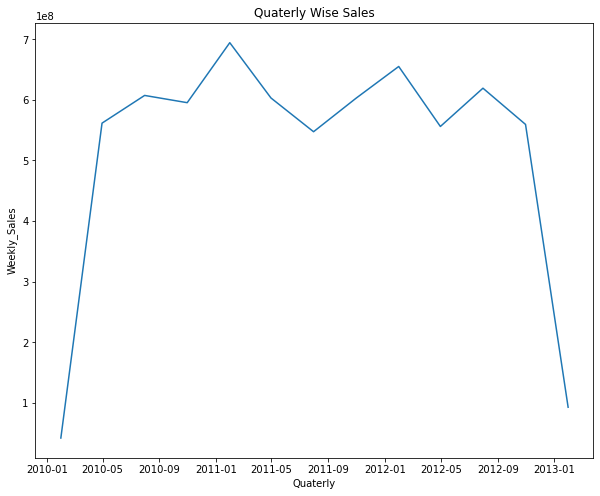

In [79]:
#Quaterly Sales 
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

#We can observe from the Quarterly Sales Graph that 
# higest sum of sales is recorded in Q1 of 2011 and 2012.

Text(0, 0.5, 'Weekly_Sales')

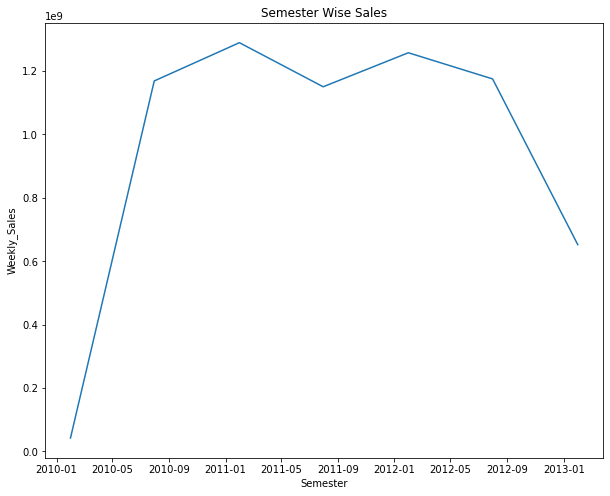

In [80]:
#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

#We can Observe from Semester Sales graph that 
# at beginning of 1st sem of 2010 and 1st sem of 2013 sales are lowest .

